# Lead Score - Case Study

### Problem Statement
An education company named X Education sells online courses to industry professionals. They receive many leads daily, but their lead conversion rate is quite low, around 30%. The company wants to identify the most promising leads, known as "Hot Leads," to improve their conversion rate. The goal is to build a model that assigns a lead score to each lead, indicating the likelihood of conversion. The target lead conversion rate is around 80%. <br>
### Goals and Objectives
- Build a Logistic Regression Model: Create a model to assign a lead score between 0 and 100 to each lead. A higher score indicates a higher likelihood of conversion.
- Adjust to Future Requirements: Ensure the model can adapt to future changes in the company's requirements.
- Provide Detailed Analysis: Include a well-commented Jupyter notebook with the logistic regression model, conversion predictions, and evaluation metrics

In [1]:
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## 1. Loading and Cleaning the Data

### 1.1 Import Data

In [2]:
lead = pd.read_csv("Leads.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 1.2 Inspect the Data

In [3]:
# Shape of data
lead.shape

(9240, 37)

In [4]:
# Checking non null count and datatype of the variables
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**-> All the datatypes of the variables are in correct format**

In [5]:
# Describing the data
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 1.3 Cleaning the Data

In [6]:
# Converting all the values to lower case
lead = lead.applymap(lambda s:s.lower() if type(s) == str else s)

In [7]:
# Replacing 'Select' with NaN (Since it means no option is selected)
lead = lead.replace('select',np.nan)

In [8]:
# Checking if there are columns with one unique value since it won't affect our analysis
lead.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
lead1= lead.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [10]:
# Checking the percentage of missing values
round(100*(lead1.isnull().sum()/len(lead1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [11]:
# Removing all the columns that are no required and have 35% null values
lead2 = lead1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
lead2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [12]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

**-> <font color='blue'>We have significant null values in 4 columns. However, removing rows with null values would result in a substantial data loss, and these columns are crucial. Instead, we'll replace the NaN values with 'not provided'. This approach ensures that we retain all data and have almost no null values. If these columns become irrelevant in the model later, we can remove them at that stage.</font>**

In [13]:
lead2['Specialization'] = lead2['Specialization'].fillna('not provided') 
lead2['What matters most to you in choosing a course'] = lead2['What matters most to you in choosing a course'].fillna('not provided')
lead2['Country'] = lead2['Country'].fillna('not provided')
lead2['What is your current occupation'] = lead2['What is your current occupation'].fillna('not provided')
lead2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [14]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [15]:
lead2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [16]:
def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

lead2['Country'] = lead2.apply(lambda x:slots(x['Country']), axis = 1)
lead2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [17]:
# Rechecking the percentage of missing values
round(100*(lead2.isnull().sum()/len(lead2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [18]:
# Checking the percent of lose if the null values are removed
round(100*(sum(lead2.isnull().sum(axis=1) > 1)/lead2.shape[0]),2)

1.48

In [19]:
lead3 = lead2[lead2.isnull().sum(axis=1) <1]

In [20]:
# Code for checking number of rows left in percent
round(100*(lead3.shape[0])/(lead.shape[0]),2)

98.2

In [21]:
# Rechecking the percentage of missing values
round(100*(lead3.isnull().sum()/len(lead3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [22]:
# To familiarize all the categorical values
for column in lead3:
    print(lead3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [23]:
# Removing Id values since they are unique for everyone
lead_final = lead3.drop('Prospect ID', axis=1)
lead_final.shape

(9074, 21)

## 2. EDA

### 2.1 Univariate Analysis

#### 2.1.1 Categorical Variables

In [24]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

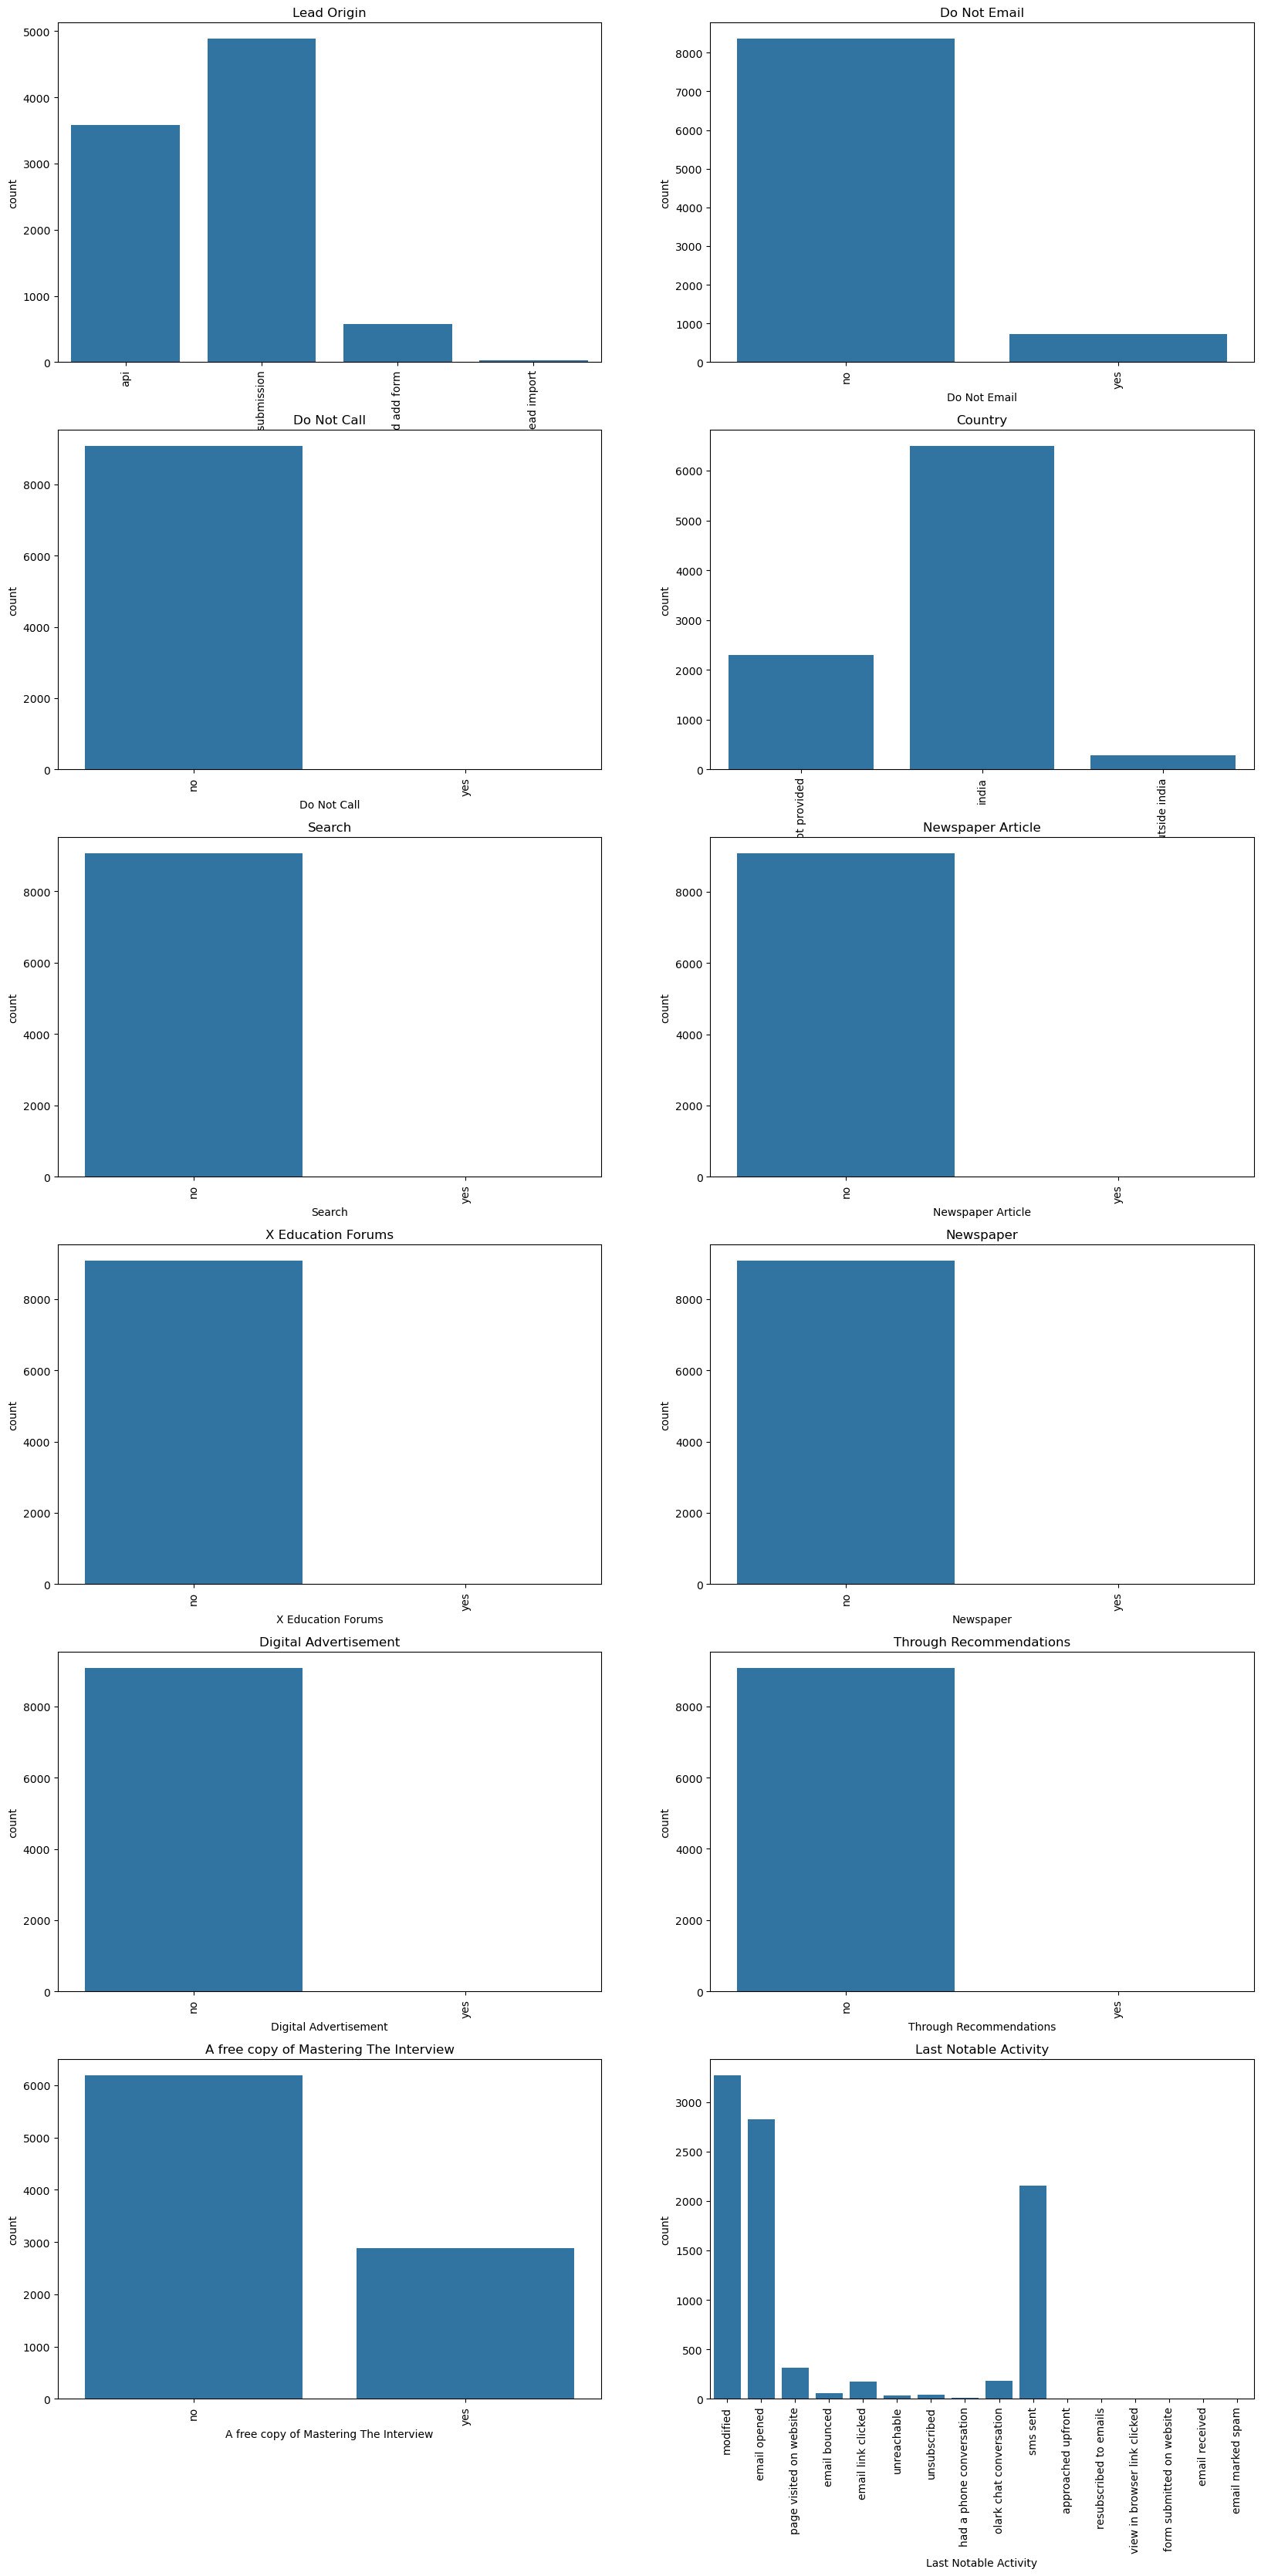

In [25]:
plt.figure(figsize = (20,40))

plt.subplot(6,2,1)
sns.countplot(x=lead_final['Lead Origin'])
plt.title('Lead Origin')
plt.xticks(rotation=90)

plt.subplot(6,2,2)
sns.countplot(x=lead_final['Do Not Email'])
plt.title('Do Not Email')
plt.xticks(rotation=90)

plt.subplot(6,2,3)
sns.countplot(x=lead_final['Do Not Call'])
plt.title('Do Not Call')
plt.xticks(rotation=90)

plt.subplot(6,2,4)
sns.countplot(x=lead_final['Country'])
plt.title('Country')
plt.xticks(rotation=90)

plt.subplot(6,2,5)
sns.countplot(x=lead_final['Search'])
plt.title('Search')
plt.xticks(rotation=90)

plt.subplot(6,2,6)
sns.countplot(x=lead_final['Newspaper Article'])
plt.title('Newspaper Article')
plt.xticks(rotation=90)

plt.subplot(6,2,7)
sns.countplot(x=lead_final['X Education Forums'])
plt.title('X Education Forums')
plt.xticks(rotation=90)

plt.subplot(6,2,8)
sns.countplot(x=lead_final['Newspaper'])
plt.title('Newspaper')
plt.xticks(rotation=90)

plt.subplot(6,2,9)
sns.countplot(x=lead_final['Digital Advertisement'])
plt.title('Digital Advertisement')
plt.xticks(rotation=90)

plt.subplot(6,2,10)
sns.countplot(x=lead_final['Through Recommendations'])
plt.title('Through Recommendations')
plt.xticks(rotation=90)

plt.subplot(6,2,11)
sns.countplot(x=lead_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.xticks(rotation=90)

plt.subplot(6,2,12)
sns.countplot(x=lead_final['Last Notable Activity'])
plt.title('Last Notable Activity')
plt.xticks(rotation=90)

plt.show()

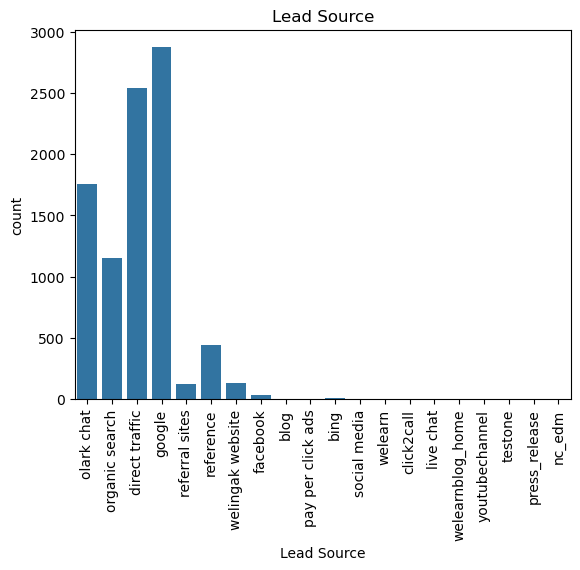

In [26]:
sns.countplot(x=lead_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.xticks(rotation=90)
plt.show()

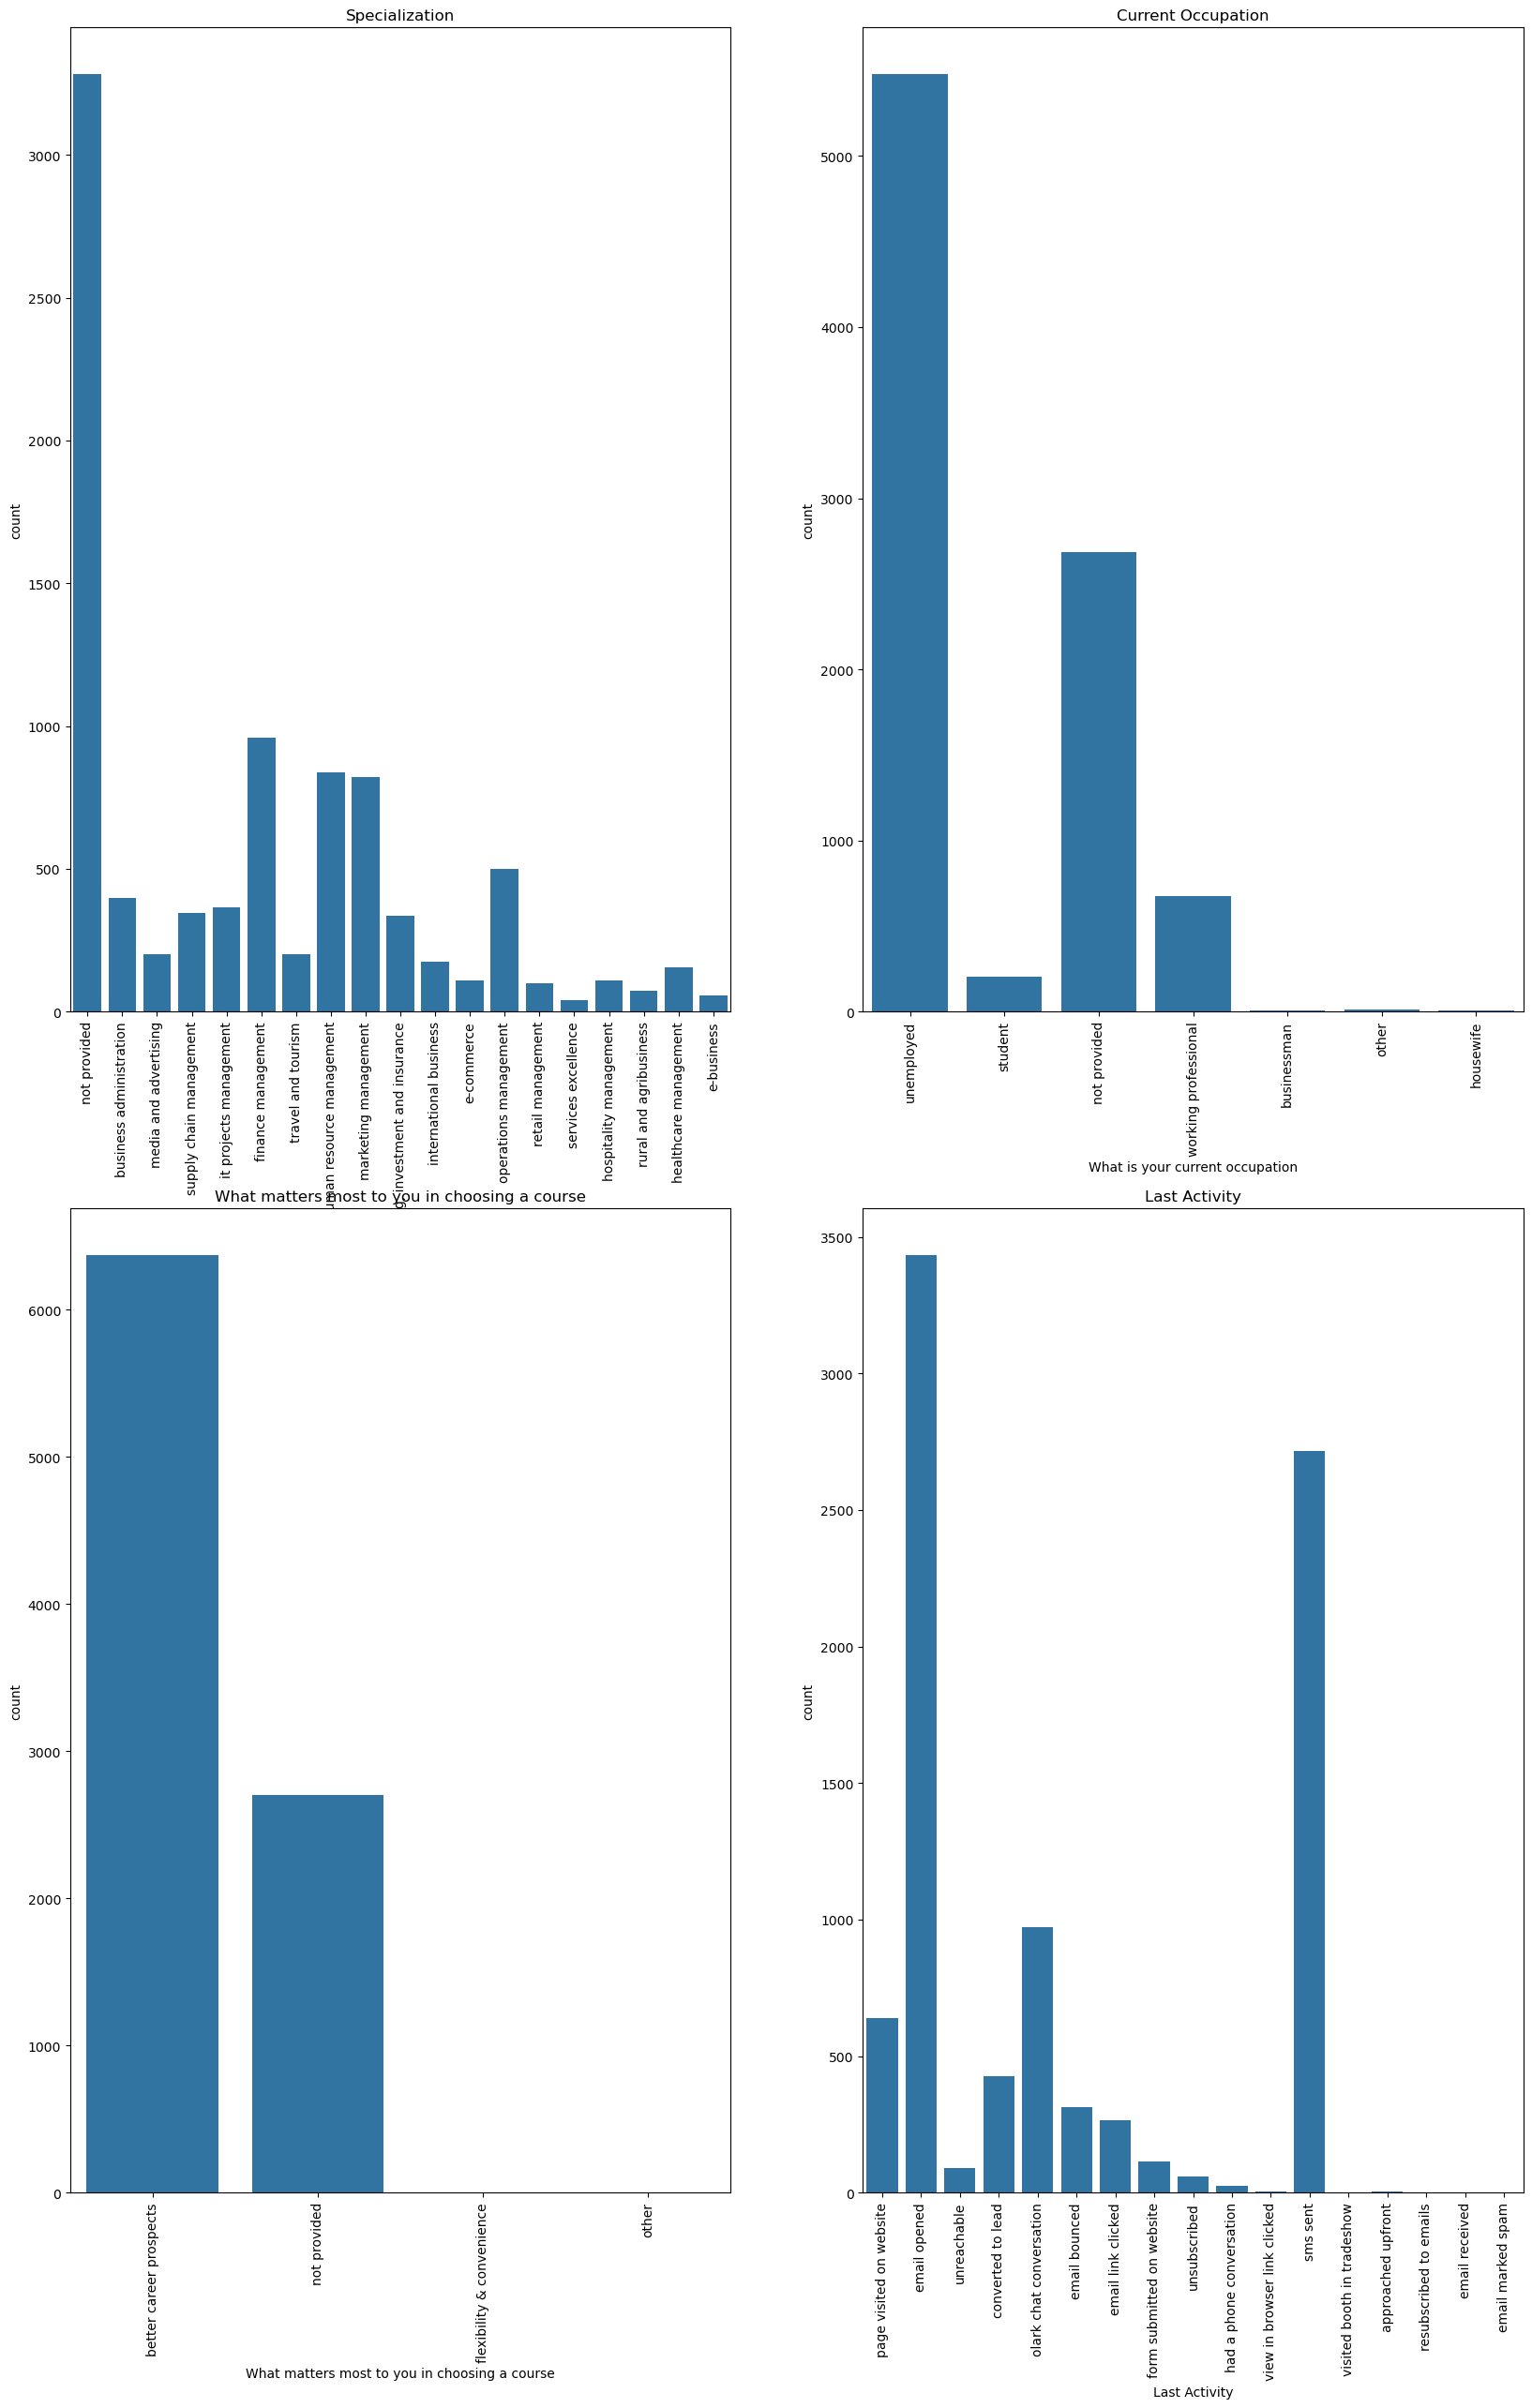

In [27]:
plt.figure(figsize=(20, 30))

plt.subplot(2, 2, 1)
sns.countplot(x=lead_final['Specialization'])
plt.title('Specialization')
plt.xticks(rotation=90)

plt.subplot(2, 2, 2)
sns.countplot(x=lead_final['What is your current occupation'])
plt.title('Current Occupation')
plt.xticks(rotation=90)

plt.subplot(2, 2, 3)
sns.countplot(x=lead_final['What matters most to you in choosing a course'])
plt.title('What matters most to you in choosing a course')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.countplot(x=lead_final['Last Activity'])
plt.title('Last Activity')
plt.xticks(rotation=90)

plt.show()

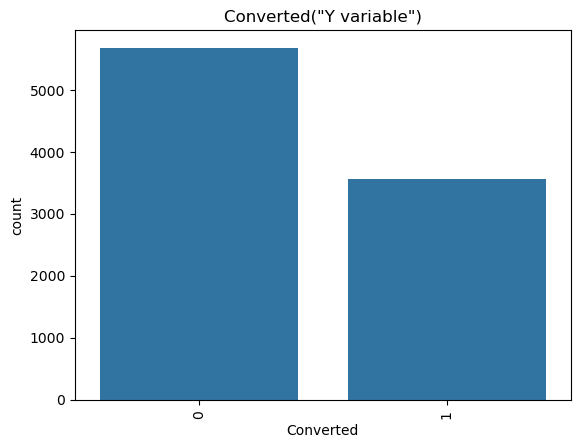

In [28]:
sns.countplot(x=lead['Converted'])
plt.title('Converted("Y variable")')
plt.xticks(rotation=90)
plt.show()

#### 2.1.2 Numeric Variable

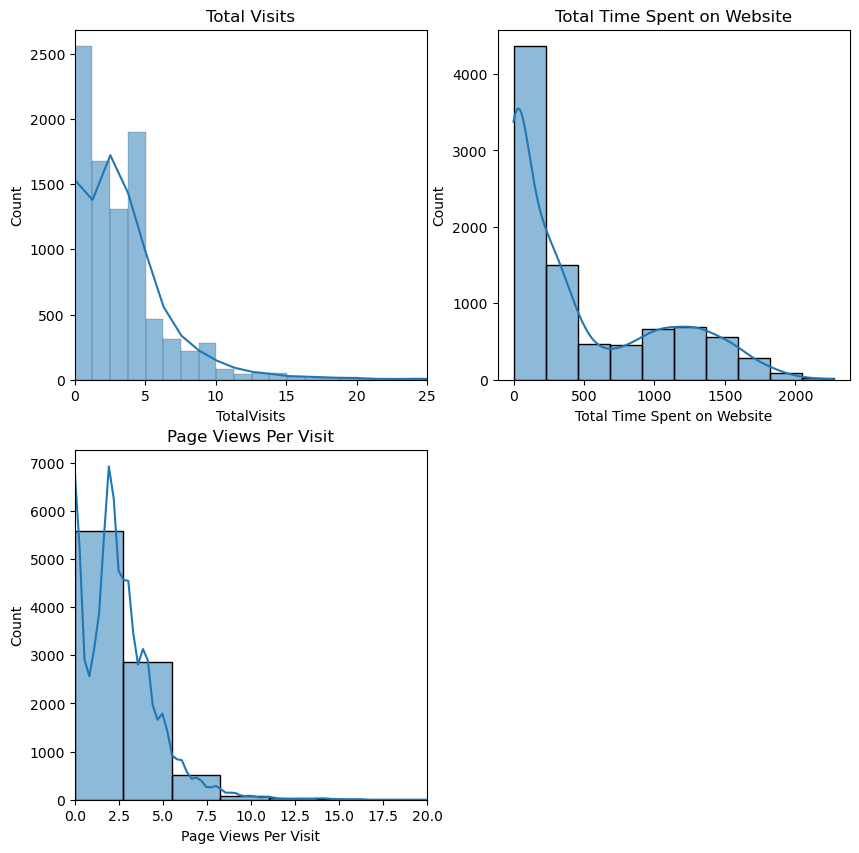

In [29]:
plt.figure(figsize = (10,10))
plt.subplot(221)
sns.histplot(lead_final['TotalVisits'],kde=True, bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
sns.histplot(lead_final['Total Time Spent on Website'],kde=True, bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
sns.histplot(lead_final['Page Views Per Visit'],kde=True, bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show( ) 

### 2.2 Relating all the Categorical Variables to Converted

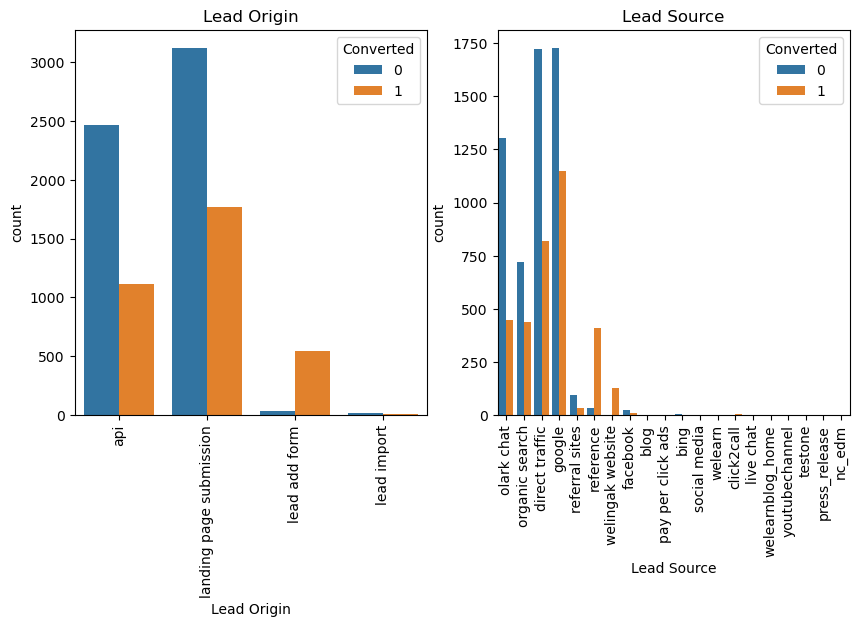

In [30]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

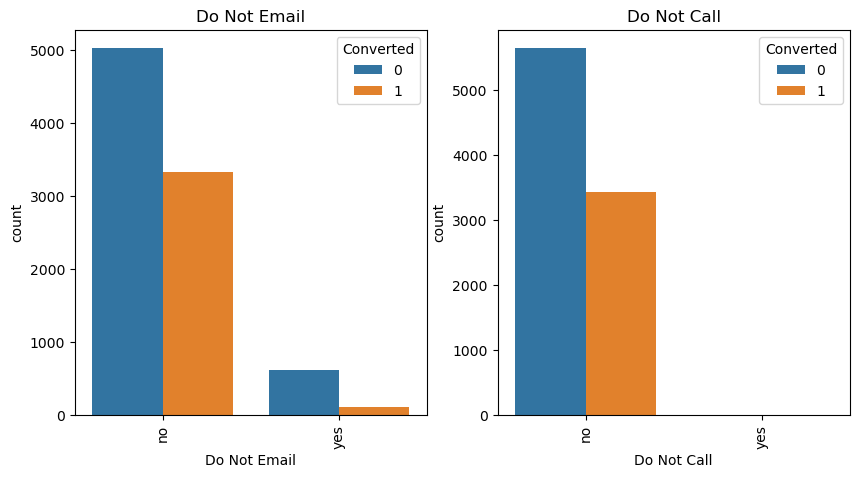

In [31]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')

plt.show()

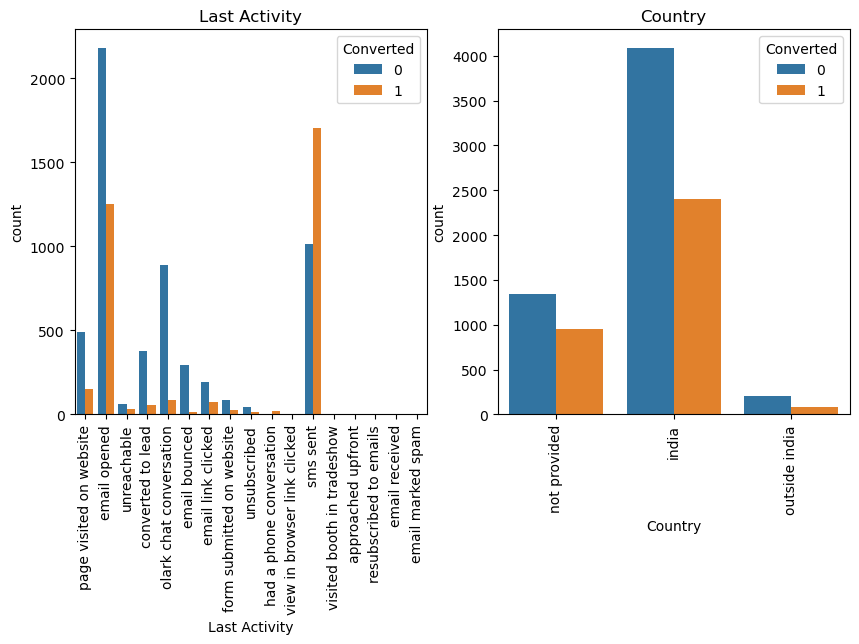

In [32]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

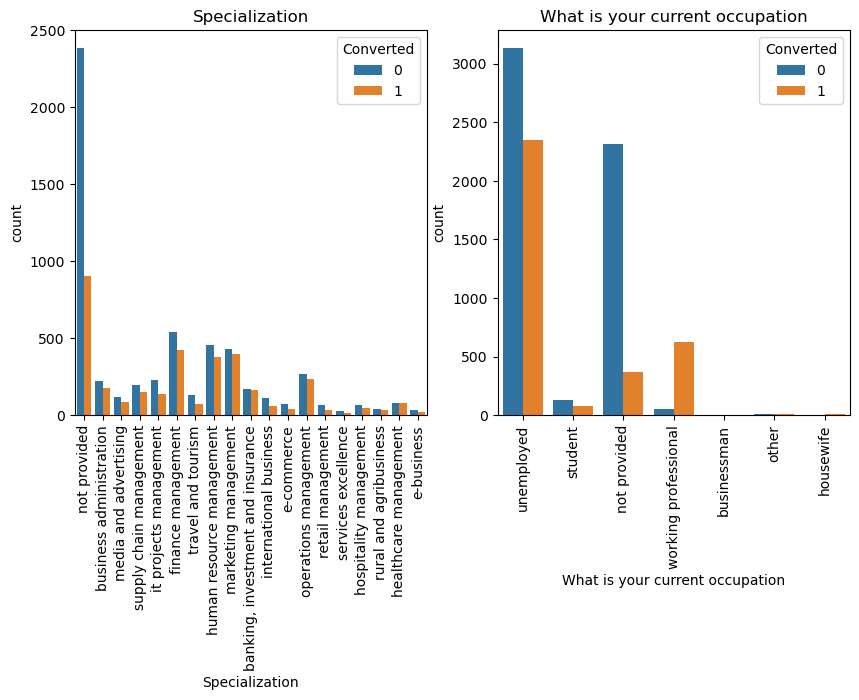

In [33]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

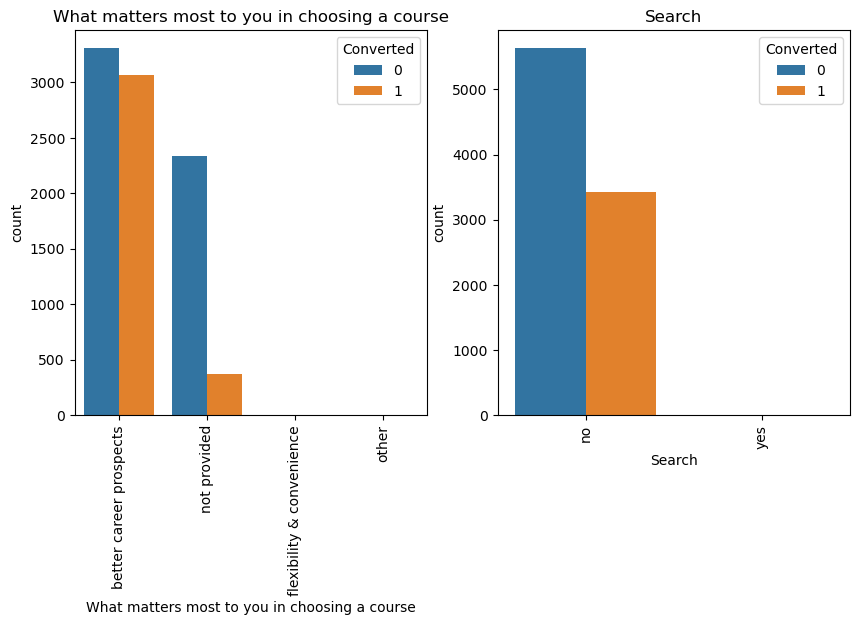

In [34]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

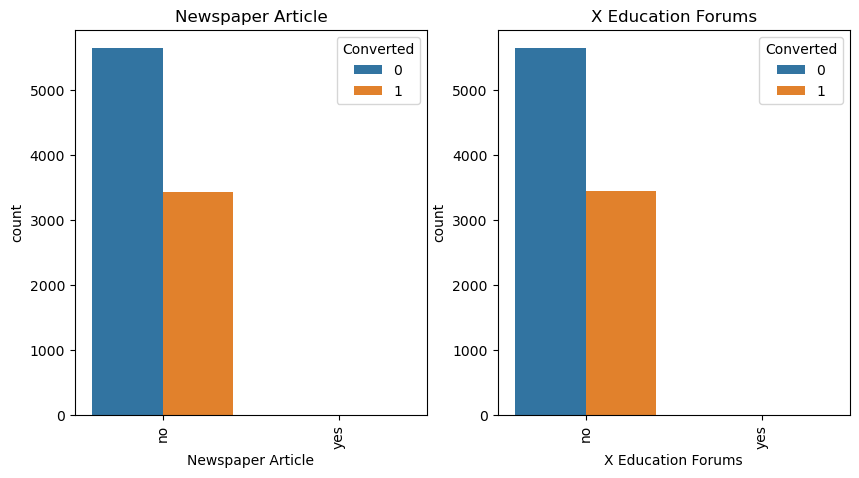

In [35]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.show()

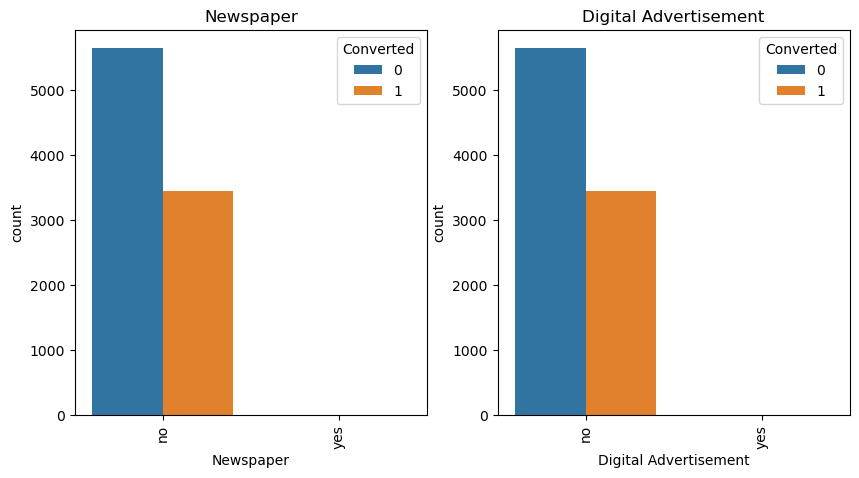

In [36]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

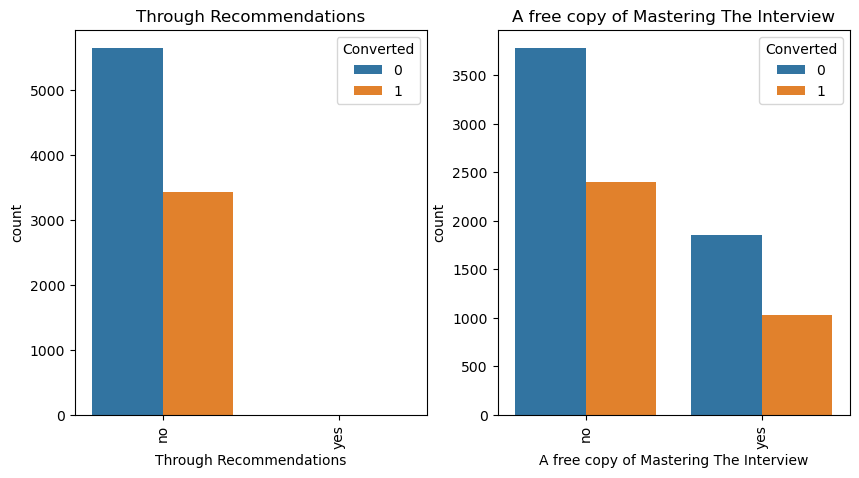

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

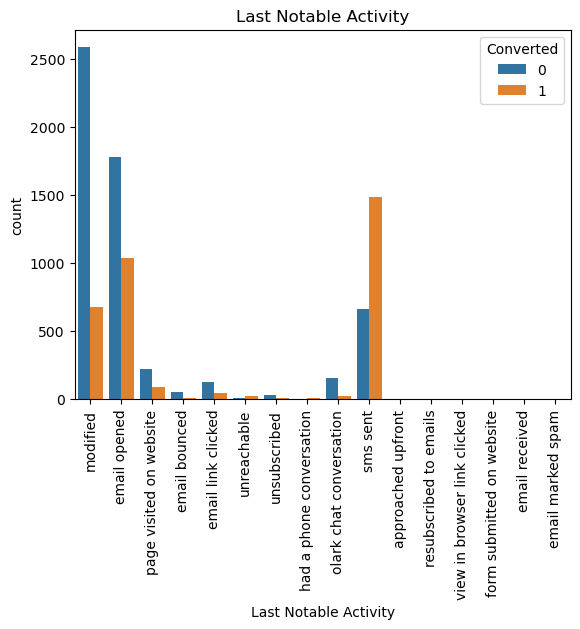

In [38]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= lead_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

In [39]:
def check_target(lead_final,column1,column2=None):
    fig, axes=plt.subplots(1, 2, figsize=(14,6))
    sns.countplot(data=lead_final,x=column1,palette='Set1',ax=axes[0])
    axes[0].set_title(f'{column1}')
    axes[0].set_xlabel(column1)
    axes[0].set_yscale("log")
    axes[0].set_ylabel("count")
    axes[0].tick_params(rotation=45)
    if column2:
        sns.countplot(data=lead_final,x=column2,hue="Converted",palette='Set1',ax=axes[1])
        axes[1].set_title(f'{column2}')
        axes[1].set_xlabel(column2)
        axes[1].set_yscale("log")
        axes[1].set_ylabel("count")
        axes[1].tick_params(rotation=45)
    plt.tight_layout()
    plt.show()

In [40]:
##Checking and display the Lead columns with converstiion rate.

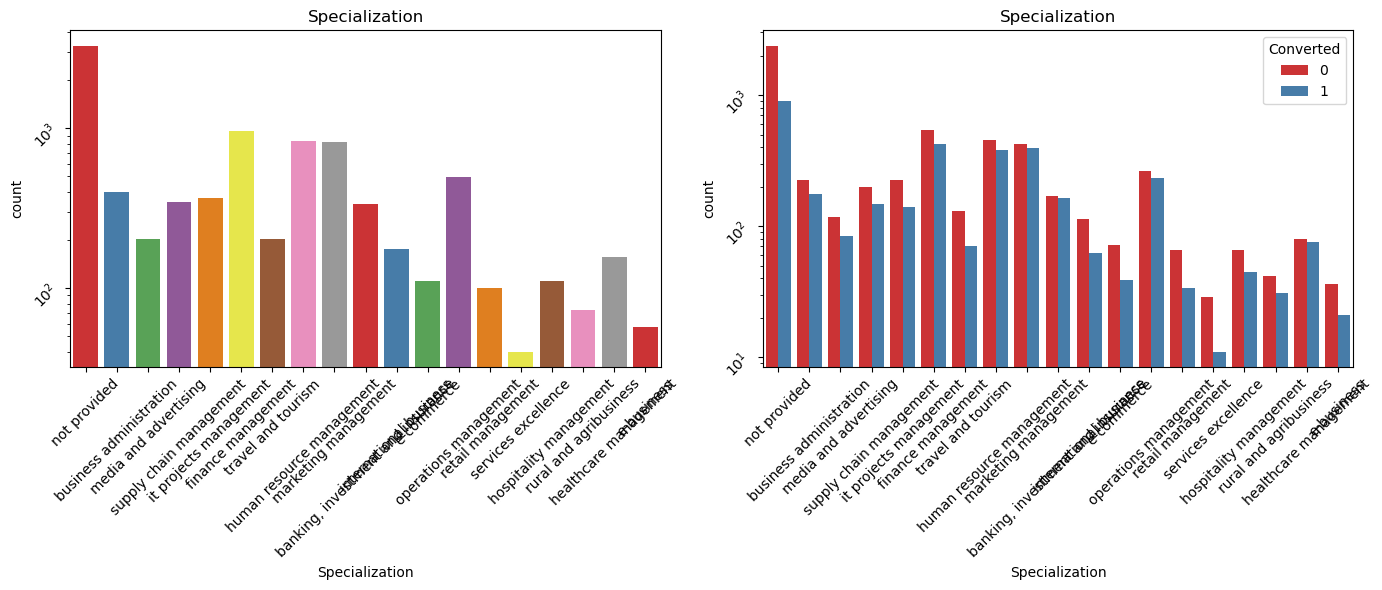

In [41]:
check_target(lead_final,'Specialization', 'Specialization')

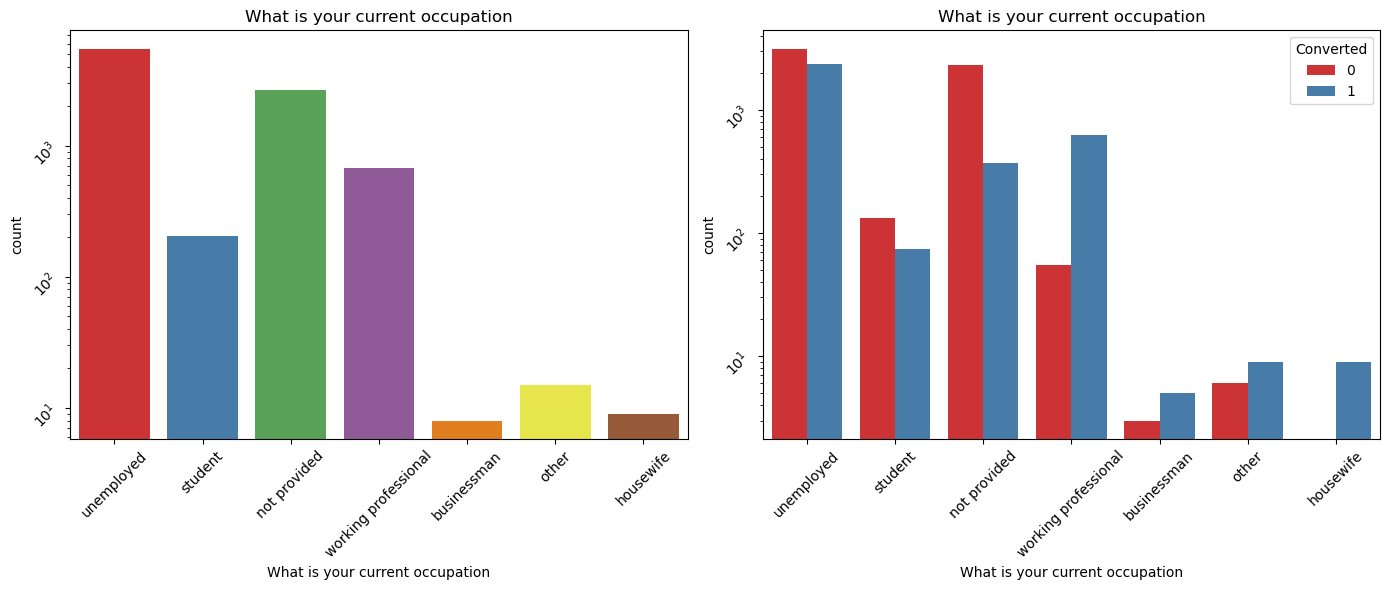

In [42]:
check_target(lead_final,'What is your current occupation', 'What is your current occupation')

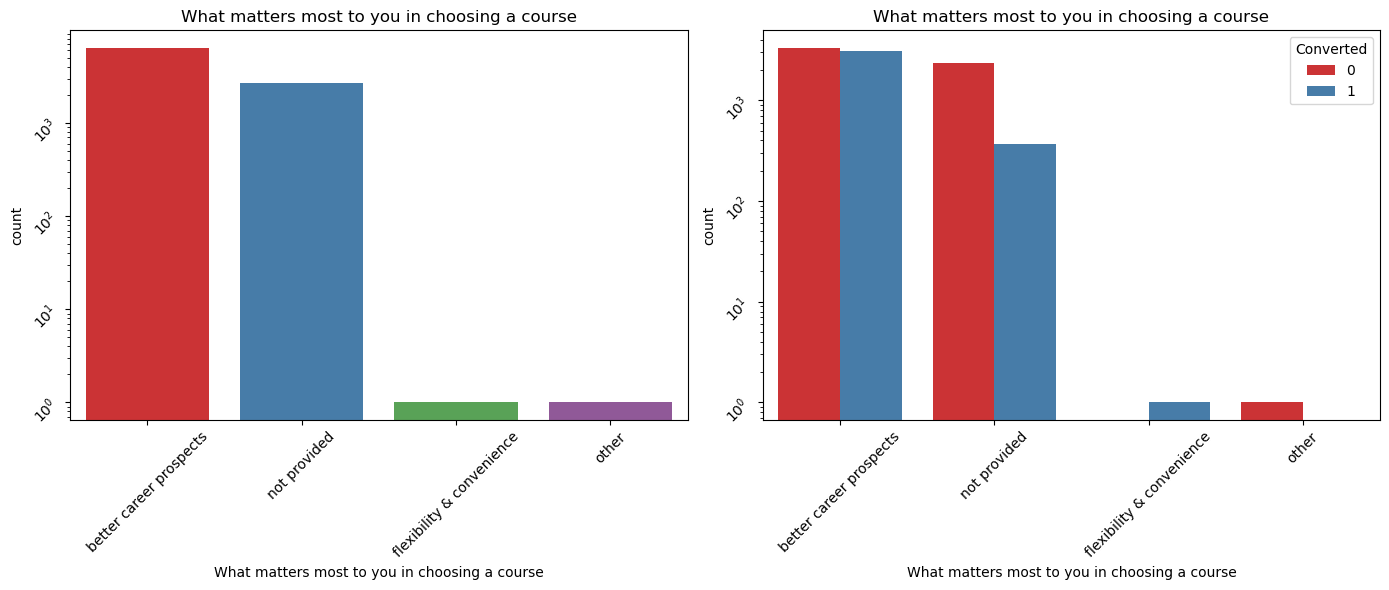

In [43]:
check_target(lead_final,'What matters most to you in choosing a course', 'What matters most to you in choosing a course')

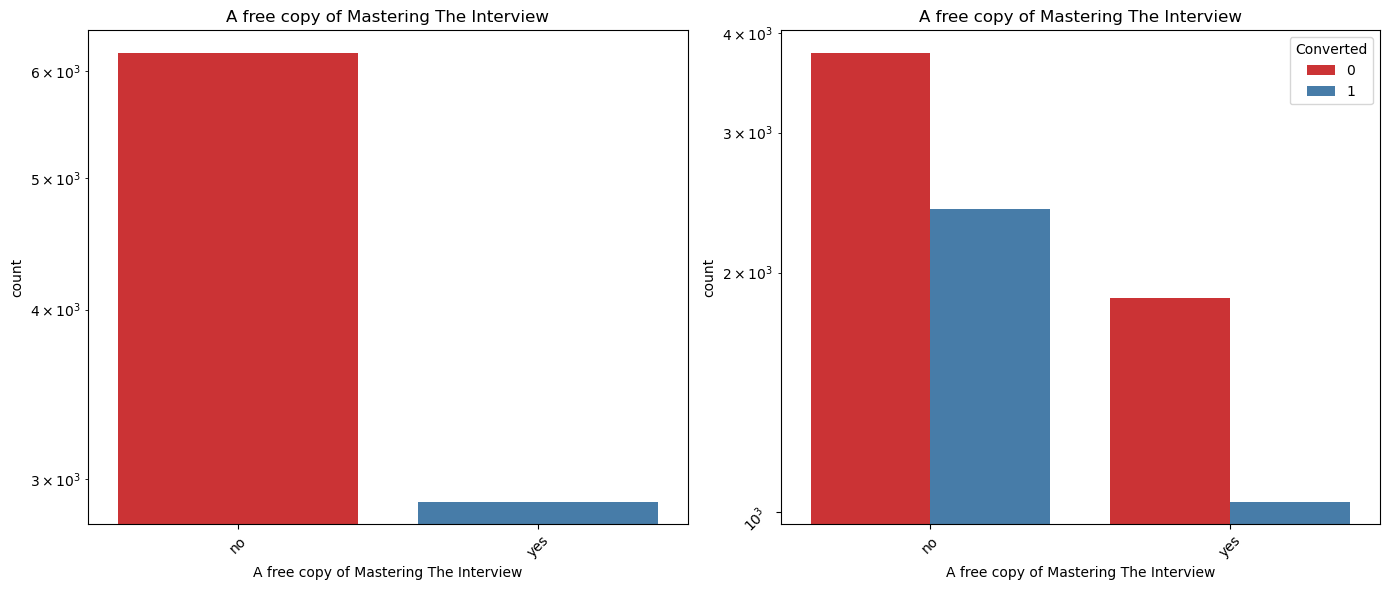

In [44]:
check_target(lead_final,'A free copy of Mastering The Interview', 'A free copy of Mastering The Interview')

In [45]:
numeric = lead_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


In [46]:
#Finding outliers

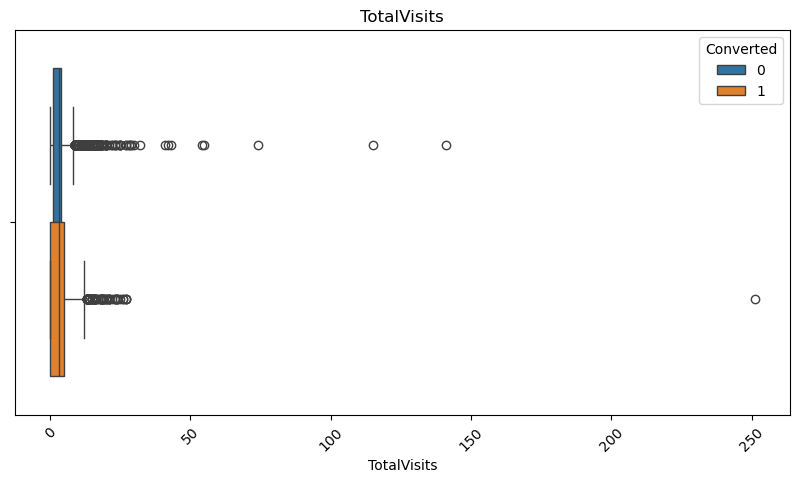

In [47]:

plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=lead_final,x='TotalVisits', hue ='Converted')
plt.title('TotalVisits')
plt.show()

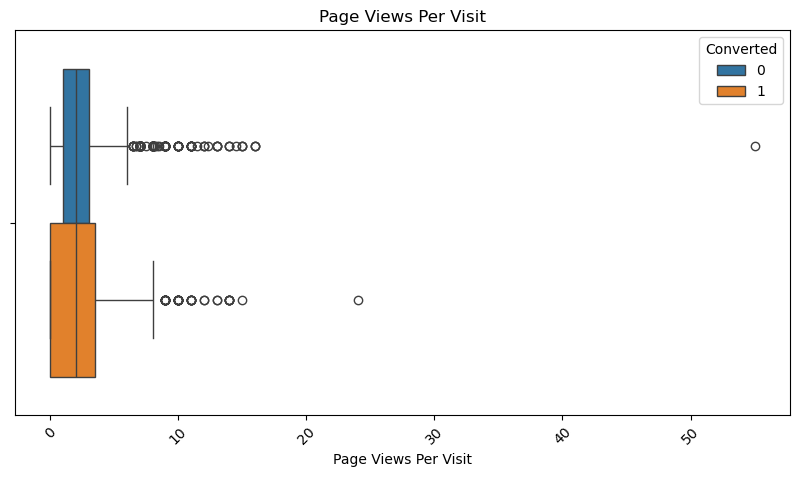

In [48]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=lead_final,x='Page Views Per Visit', hue ='Converted')
plt.title('Page Views Per Visit')
plt.show()

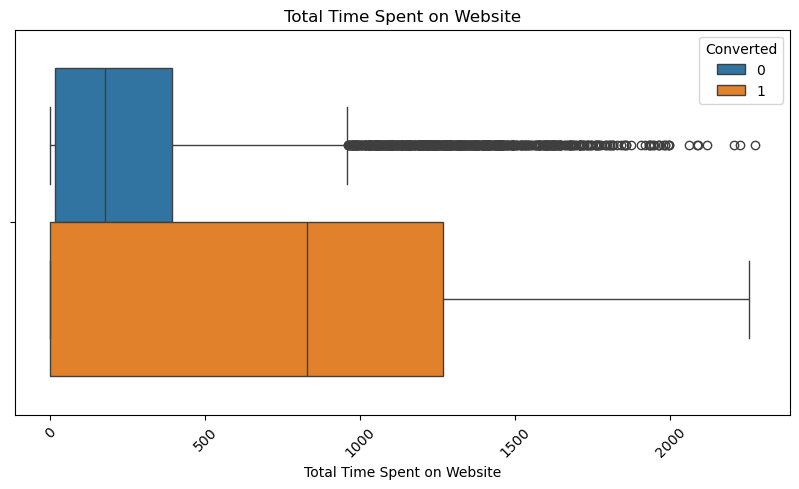

In [49]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
sns.boxplot(data=lead_final,x='Total Time Spent on Website', hue ='Converted')
plt.title('Total Time Spent on Website')
plt.show()

**-> <font color='blue'>From the above EDA, it's clear that several elements have minimal data and are likely to be less relevant to our analysis.</font>**

## 3. Dummy Variables

In [50]:
lead_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

In [51]:
lead_final.loc[:, lead_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [52]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(lead_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
lead_dum = pd.concat([lead_final, dummy], axis=1)
lead_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,no,0,5.0,674,2.5,email opened,india,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,india,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,india,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,india,...,False,False,True,False,False,False,False,False,False,False


In [53]:
lead_dum = lead_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
lead_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0.0,0,0.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,0,5.0,674,2.5,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,2.0,1532,2.0,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1.0,305,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


## 4. Test - Train Split

In [54]:
# Import the required library
from sklearn.model_selection import train_test_split

In [55]:
X = lead_dum.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [56]:
# Putting the target variable in y
y = lead_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [57]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [58]:
# Convert boolean columns to float64
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [59]:
# Import MinMax scaler
from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Specialization_business administration,Specialization_e-business,Specialization_e-commerce,Specialization_finance management,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
1289,0.014184,0.612676,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3604,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5584,0.042553,0.751761,0.250000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7679,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7563,0.014184,0.787852,0.083333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


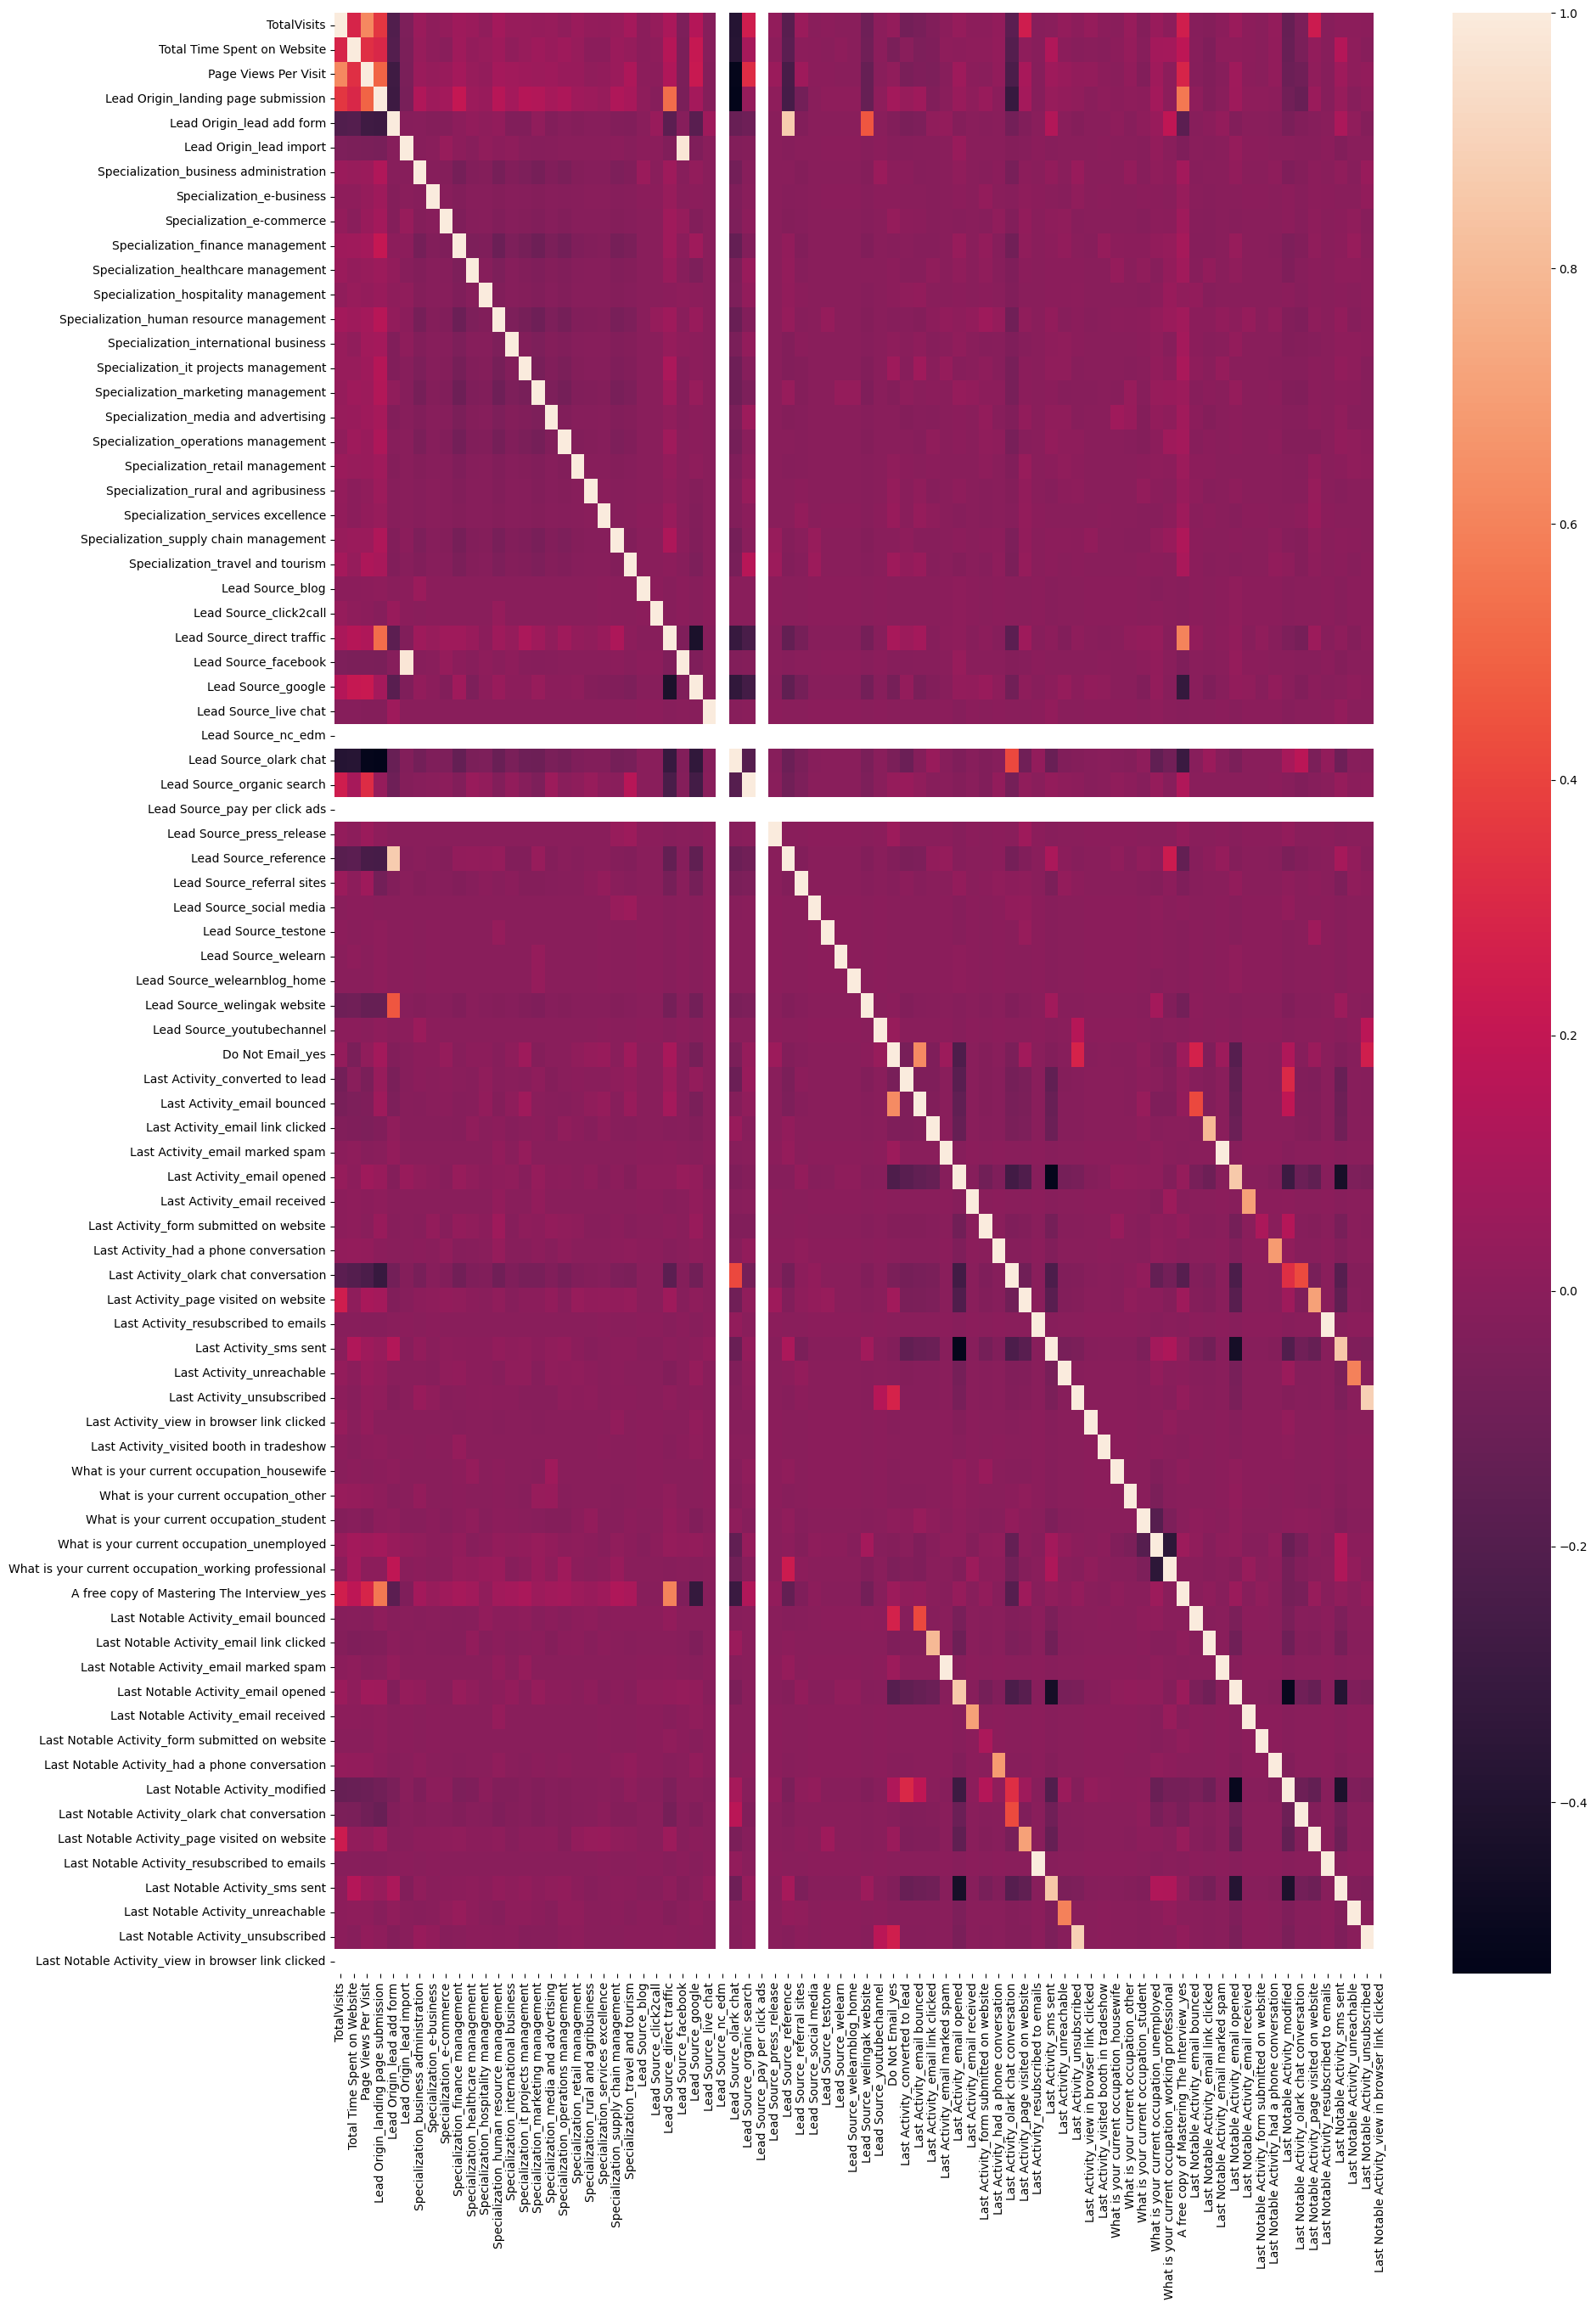

In [60]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr())
plt.show()

**-> <font color='blue'>Since there are a lot of variables it is difficult to drop variable. We'll do it after RFE</font>**

## 5. Model Building

In [61]:
# Import 'LogisticRegression'
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [62]:
# Import RFE
from sklearn.feature_selection import RFE

In [63]:
# Running RFE with 15 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [64]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_landing page submission', False, 25),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 45),
 ('Specialization_business administration', False, 32),
 ('Specialization_e-business', False, 31),
 ('Specialization_e-commerce', False, 22),
 ('Specialization_finance management', False, 29),
 ('Specialization_healthcare management', False, 24),
 ('Specialization_hospitality management', False, 40),
 ('Specialization_human resource management', False, 30),
 ('Specialization_international business', False, 36),
 ('Specialization_it projects management', False, 28),
 ('Specialization_marketing management', False, 21),
 ('Specialization_media and advertising', False, 41),
 ('Specialization_operations management', False, 26),
 ('Specialization_retail management', False, 62),
 ('Specialization_rural and agribusiness', False, 23),
 ('Specialization_serv

In [65]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]

**-> <font color='blue'>All the variables selected by RFE, next statistics part (p-values and the VIFs)</font>**

In [66]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [67]:
# Importing statsmodels
import statsmodels.api as sm

In [68]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2741.3
Date:                Sun, 15 Dec 2024   Deviance:                       5482.6
Time:                        13:25:11   Pearson chi2:                 6.64e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3758
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2524      0.081    -15.450      0.000      -1.411      -1.094
TotalVisits                                              4.5519      1.398      3.256      0.001       1.812       7.292
Total Time Spent on Website                              4.5660      0.162     28.101      0.000       4.248       4.884
Lead Origin_lead add form                                2.6773      0.225     11.916      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.979      0.000      -1.703      -1.256
Lead Source_google                                      -1.1705      0.109    -10.690      0.000      -1.385      -0.956
Lead Source_organic search                              -1.2823      0.134     -9.541      0.000      -1.546      -1.019
Lead Source_welingak website                             2.5984      1.033      2.515      0.012       0.573       4.624
Do Not Email_yes                                        -1.4076      0.168     -8.387      0.000      -1.737      -1.079
Last Activity_olark chat conversation                   -1.4678      0.165     -8.874      0.000      -1.792      -1.144
Last Activity_sms sent                                   1.3213      0.073     18.222      0.000       1.179       1.463
What is your current occupation_housewife               24.4759   3.07e+04      0.001      0.999   -6.01e+04    6.01e+04
What is your current occupation_other                    1.4134      0.760      1.859      0.063      -0.077       2.904
What is your current occupation_working professional     2.8071      0.193     14.509      0.000       2.428       3.186
Last Notable Activity_had a phone conversation          24.2053   2.18e+04      0.001      0.999   -4.28e+04    4.28e+04
Last Notable Activity_unreachable                        1.7029      0.610      2.790      0.005       0.507       2.899
========================================================================================================================
"""

In [69]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [70]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


**-> <font color='blue'>The VIF values seem fine but the p-values aren't. So removing 'Last Notable Activity had a phone conversation'</blue>**

In [71]:
X_train.drop('Last Notable Activity_had a phone conversation', axis = 1, inplace = True)

In [72]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2749.9
Date:                Sun, 15 Dec 2024   Deviance:                       5499.7
Time:                        13:25:11   Pearson chi2:                 6.64e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.3741
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2492      0.081    -15.422      0.000      -1.408      -1.090
TotalVisits                                              4.7231      1.410      3.349      0.001       1.959       7.488
Total Time Spent on Website                              4.5511      0.162     28.089      0.000       4.234       4.869
Lead Origin_lead add form                                2.6773      0.225     11.918      0.000       2.237       3.118
Lead Source_direct traffic                              -1.4795      0.114    -12.987      0.000      -1.703      -1.256
Lead Source_google                                      -1.1600      0.109    -10.611      0.000      -1.374      -0.946
Lead Source_organic search                              -1.2778      0.134     -9.510      0.000      -1.541      -1.014
Lead Source_welingak website                             2.5990      1.033      2.515      0.012       0.574       4.624
Do Not Email_yes                                        -1.4113      0.168     -8.413      0.000      -1.740      -1.083
Last Activity_olark chat conversation                   -1.4730      0.165     -8.908      0.000      -1.797      -1.149
Last Activity_sms sent                                   1.3132      0.072     18.136      0.000       1.171       1.455
What is your current occupation_housewife               22.4667   1.13e+04      0.002      0.998   -2.21e+04    2.21e+04
What is your current occupation_other                    1.4049      0.760      1.848      0.065      -0.085       2.895
What is your current occupation_working professional     2.8013      0.193     14.487      0.000       2.422       3.180
Last Notable Activity_unreachable                        1.6925      0.610      2.774      0.006       0.497       2.888
========================================================================================================================
"""

In [73]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
12,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


**-> <font color='blue'>The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation housewife'</font>**

In [74]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [75]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2755.4
Date:                Sun, 15 Dec 2024   Deviance:                       5510.8
Time:                        13:25:12   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2461      0.081    -15.396      0.000      -1.405      -1.087
TotalVisits                                              4.6490      1.403      3.314      0.001       1.899       7.399
Total Time Spent on Website                              4.5480      0.162     28.098      0.000       4.231       4.865
Lead Origin_lead add form                                2.6841      0.224     11.957      0.000       2.244       3.124
Lead Source_direct traffic                              -1.4736      0.114    -12.954      0.000      -1.697      -1.251
Lead Source_google                                      -1.1551      0.109    -10.580      0.000      -1.369      -0.941
Lead Source_organic search                              -1.2633      0.134     -9.426      0.000      -1.526      -1.001
Lead Source_welingak website                             2.5921      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4146      0.168     -8.437      0.000      -1.743      -1.086
Last Activity_olark chat conversation                   -1.4765      0.165     -8.932      0.000      -1.800      -1.152
Last Activity_sms sent                                   1.3072      0.072     18.070      0.000       1.165       1.449
What is your current occupation_other                    1.4003      0.760      1.842      0.066      -0.090       2.890
What is your current occupation_working professional     2.7968      0.193     14.467      0.000       2.418       3.176
Last Notable Activity_unreachable                        1.6871      0.610      2.766      0.006       0.492       2.883
========================================================================================================================
"""

In [76]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.34
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
11,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


**-> <font color='blue'>The VIF values seem fine but the p-values aren't. So removing 'What is your current occupation other'</font>**

In [77]:
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)

In [78]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2757.3
Date:                Sun, 15 Dec 2024   Deviance:                       5514.5
Time:                        13:25:12   Pearson chi2:                 6.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3726
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.2466      0.081    -15.398      0.000      -1.405      -1.088
TotalVisits                                              4.7586      1.410      3.375      0.001       1.995       7.522
Total Time Spent on Website                              4.5539      0.162     28.136      0.000       4.237       4.871
Lead Origin_lead add form                                2.6860      0.224     11.966      0.000       2.246       3.126
Lead Source_direct traffic                              -1.4706      0.114    -12.929      0.000      -1.694      -1.248
Lead Source_google                                      -1.1564      0.109    -10.588      0.000      -1.370      -0.942
Lead Source_organic search                              -1.2631      0.134     -9.416      0.000      -1.526      -1.000
Lead Source_welingak website                             2.5923      1.033      2.509      0.012       0.567       4.617
Do Not Email_yes                                        -1.4186      0.168     -8.461      0.000      -1.747      -1.090
Last Activity_olark chat conversation                   -1.4717      0.165     -8.909      0.000      -1.796      -1.148
Last Activity_sms sent                                   1.3038      0.072     18.031      0.000       1.162       1.445
What is your current occupation_working professional     2.7934      0.193     14.449      0.000       2.414       3.172
Last Notable Activity_unreachable                        1.6837      0.610      2.761      0.006       0.488       2.879
========================================================================================================================
"""

In [79]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Time Spent on Website,2.33
0,TotalVisits,2.28
4,Lead Source_google,2.04
3,Lead Source_direct traffic,1.91
5,Lead Source_organic search,1.60
9,Last Activity_sms sent,1.49
2,Lead Origin_lead add form,1.47
6,Lead Source_welingak website,1.31
10,What is your current occupation_working profes...,1.17
7,Do Not Email_yes,1.10


**-> <font color='blue'>All the VIF values are good and all the p-values are below 0.05. So we can fix model.</font>**

## 6. Creating Prediction

In [80]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1289    0.611739
3604    0.223294
5584    0.425011
7679    0.223294
7563    0.432202
7978    0.732762
7780    0.130274
7863    0.982565
838     0.779231
708     0.132990
dtype: float64

In [81]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.61173868, 0.22329356, 0.42501069, 0.22329356, 0.43220183,
       0.73276232, 0.13027447, 0.9825646 , 0.77923117, 0.13298976])

In [82]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1.0,0.611739
1,0.0,0.223294
2,0.0,0.425011
3,0.0,0.223294
4,0.0,0.432202


In [83]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1.0,0.611739,1
1,0.0,0.223294,0
2,0.0,0.425011,0
3,0.0,0.223294,0
4,0.0,0.432202,0


## 7. Model Evaluation

In [84]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [85]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [86]:
# Predicted     not_churn    churn
# Actual
# not_churn       3403        492
# churn            729       1727

In [87]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.807746811525744

**-> <font color='blue'>An accuracy rate of approximately 81% is highly commendable.</font>**

In [88]:
# Substituting the value of true positive
TP = confusion[1,1]

# Substituting the value of true negatives
TN = confusion[0,0]

# Substituting the value of false positives
FP = confusion[0,1] 

# Substituting the value of false negatives
FN = confusion[1,0]

In [89]:
# Calculating the sensitivity
TP/(TP+FN)

0.7031758957654723

In [90]:
# Calculating the specificity
TN/(TN+FP)

0.8736842105263158

**-> <font color='blue'>With the current cut off as 0.5 we have around 81% accuracy, sensitivity ≈ 70% and specificity ≈ 87%.</font>**

## 8. Optimise cut off (ROC Curve)

-> The previous cut off was randomly selected. Now we have to find a optimum one

In [91]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [92]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

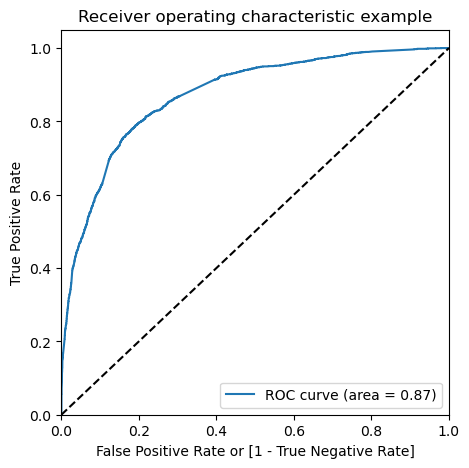

In [93]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

**-> <font color='blue'>The area under ROC curve is 0.87 which is a very good value.</font>**

In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1.0,0.611739,1,1,1,1,1,1,1,1,0,0,0
1,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.425011,0,1,1,1,1,1,0,0,0,0,0
3,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0
4,0.0,0.432202,0,1,1,1,1,1,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.572508,0.972720,0.320154
0.2,0.2,0.717840,0.923453,0.588190
0.3,0.3,0.783341,0.829397,0.754300
0.4,0.4,0.805228,0.765879,0.830039
0.5,0.5,0.807747,0.703176,0.873684
0.6,0.6,0.784758,0.569625,0.920411
0.7,0.7,0.769643,0.495114,0.942747
0.8,0.8,0.749961,0.400651,0.970218
0.9,0.9,0.700205,0.243485,0.988190


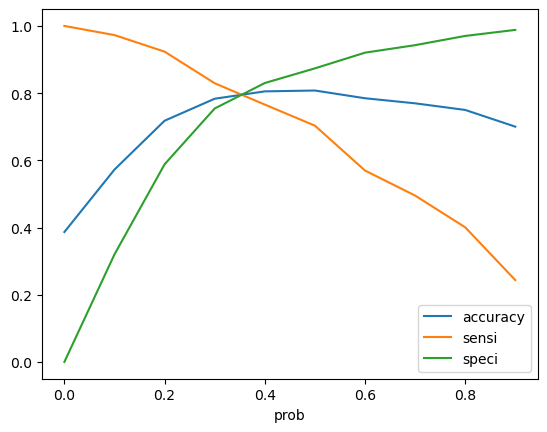

In [96]:
# Plotting it
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

**-> <font color='blue'>From the graph it is visible that the optimal cut off is at 0.35.</font>**

In [97]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0.0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7967249252086286

In [99]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3097,  798],
       [ 493, 1963]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [101]:
# Calculating the sensitivity
TP/(TP+FN)

0.7992671009771987

In [102]:
# Calculating the specificity
TN/(TN+FP)

0.7951219512195122

**-> <font color='blue'>With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.</font>**

## 9. Prediction of Test Set

In [103]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [104]:
# Substituting all the columns in the final train model
col = X_train.columns

In [105]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]

# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_welingak website,Do Not Email_yes,Last Activity_olark chat conversation,Last Activity_sms sent,What is your current occupation_working professional,Last Notable Activity_unreachable
8308,1.0,0.035461,0.416813,False,True,False,False,False,False,False,False,False,False
7212,1.0,0.028369,0.001320,False,False,False,True,False,False,False,True,True,False
2085,1.0,0.000000,0.000000,True,False,False,False,True,False,False,False,False,False
4048,1.0,0.028369,0.617077,False,True,False,False,False,False,False,True,False,False
4790,1.0,0.028369,0.005282,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,1.0,0.000000,0.000000,False,False,False,False,False,False,True,False,False,False
8179,1.0,0.170213,0.148768,False,False,True,False,False,False,False,True,False,False
6236,1.0,0.000000,0.000000,False,False,False,False,False,False,False,False,False,False
5240,1.0,0.078014,0.458627,False,False,True,False,False,False,False,True,False,False


In [106]:
X_test_sm = X_test_sm.astype(float)

In [107]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [108]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
...,...,...,...
2718,1,0.061901,0
2719,0,0.595864,1
2720,0,0.223294,0
2721,1,0.795858,1


In [109]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8005875872199779

In [110]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1394,  350],
       [ 193,  786]], dtype=int64)

In [111]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [112]:
# Calculating the sensitivity
TP/(TP+FN)

0.8028600612870276

In [113]:
# Calculating the specificity
TN/(TN+FP)

0.7993119266055045

**-> <font color='blue'>With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.</font>**

## 10. Precision - Recall

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3403,  492],
       [ 729, 1727]], dtype=int64)

In [115]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7782785038305543

In [116]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7031758957654723

**-> <font color='blue'>With the current cut off as 0.35 we have Precision around 78% and Recall around 70%</font>**

### 10.1 Precision and Recall Tradeoff

In [117]:
from sklearn.metrics import precision_recall_curve

In [118]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1.0
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 6346    0.0
 6347    0.0
 6348    0.0
 6349    0.0
 6350    1.0
 Name: Converted, Length: 6351, dtype: float64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [119]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

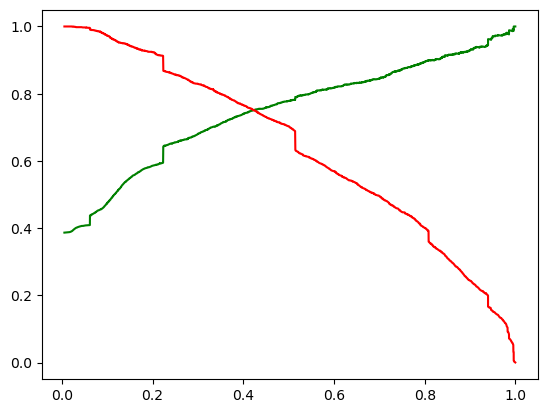

In [120]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [121]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1.0,0.611739,1,1,1,1,1,1,1,1,0,0,0,1
1,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.425011,0,1,1,1,1,1,0,0,0,0,0,1
3,0.0,0.223294,0,1,1,1,0,0,0,0,0,0,0,0
4,0.0,0.432202,0,1,1,1,1,1,0,0,0,0,0,1


In [122]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8060148008187688

In [123]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3256,  639],
       [ 593, 1863]], dtype=int64)

In [124]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [125]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7446043165467626

In [126]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7585504885993485

**-> <font color='blue'>With the current cut off as 0.41 we have Precision around 74% and Recall around 76%</font>**

## 11. Prediction on Test Set

In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.342925
1,1,0.849219
2,1,0.982565
3,1,0.822258
4,0,0.071883


In [128]:
# Making prediction using cut off 0.41
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.342925,0
1,1,0.849219,1
2,1,0.982565,1
3,1,0.822258,1
4,0,0.071883,0
...,...,...,...
2718,1,0.061901,0
2719,0,0.595864,1
2720,0,0.223294,0
2721,1,0.795858,1


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.808666911494675

In [130]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1465,  279],
       [ 242,  737]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [132]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7253937007874016

In [133]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7528089887640449

**-> <font color='blue'>With the current cut off as 0.41 we have Precision around 73% and Recall around 75%</font>**

## Conclusion
Based on our findings, the most critical variables influencing potential buyers, ranked in descending order, are as follows:

1. **Total time spent on the website**
2. **Total number of visits**
3. **Lead source:**
   - Google
   - Direct traffic
   - Organic search
   - Welingak website
4. **Last activity:**
   - SMS
   - Olark chat conversation
5. **Lead origin:**
   - Lead ad format
6. **Current occupation:**
   - Working professional

Taking these factors into account, X Education has a strong opportunity to persuade nearly all potential buyers to invest in their courses, leading to significant growth and success.